In [67]:
'''
Through plotting the scooters on a 2D graph, it is evident that there are groups of scooters close to each other.
To identify these clusters, I used k-means clustering to group the scooters into 4 clusters. The cluisters had the
following sizes: (Blue:7050), (Yellow:5813), (Green:4886), (Purple:7919) 
The average charge per scooter in these clusters were 2.49, 2.47, 2.50, 2.52 respectively.
The SuperCharger is quite far from the scooters, and is closest to the green cluster.
The distances between Clusters is mentioned below (assuming unit length to be 1 mile):
Blue-Yellow = 0.43 miles
Blue-Purple = 1.36
Blue-Green = 1.57
Yellow-Purple = 1.86
Yellow-Green = 1.06

Sinced the scooters have the approx. the same avg charge, we should prioritize charging the scooters in clusters from
the highest to lowest in terms of quantity. i.e, Purple, Blue, Yellow, Green
The distance between Purple and Blue are approx. 1.36 miles, and assuming a speed of 50mph, it will take 1.6 min to travel.
The supercharger should picl up scooters from Purple, and drop them off at Blue and then pick up some more at Blue and drop them off at Purple. Once all the scooters have been charged, the same can be repeated at the Green and Yellow clusters.
The charging will take on avg 2.5 hrs per scooter.
'''

'\nThrough plotting the scooters on a 2D graph, it is evident that there are groups of scooters close to each other.\nTo identify these clusters, I used k-means clustering to group the scooters into 4 clusters. The cluisters had the\nfollowing sizes: (Blue:7050), (Yellow:5813), (Green:4886), (Purple:7919) \nThe average charge per scooter in these clusters were 2.49, 2.47, 2.50, 2.52 respectively.\nThe SuperCharger is quite far from the scooters, and is closest to the green cluster.\nThe distances between Clusters is mentioned below (assuming unit length to be 1 mile):\nBlue-Yellow = 0.43 miles\nBlue-Purple = 1.36\nBlue-Green = 1.57\nYellow-Purple = 1.86\nYellow-Green = 1.06\n\nSinced the scooters have the approx. the same avg charge, we should prioritize charging the scooters in clusters from\nthe highest to lowest in terms of quantity. i.e, Purple, Blue, Yellow, Green\nThe distance between Purple and Blue are approx. 1.36 miles, and assuming a speed of 50mph, it will take 1.6 min to t

In [68]:
import pandas as pd 
import numpy as np
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("dataset.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,scooter_id,xcoordinate,ycoordinate,power_level
0,0,0.906835,0.776484,0
1,1,0.928587,0.804964,2
2,2,0.904091,0.784043,1
3,3,0.906752,0.804461,0
4,4,0.900641,0.781683,4


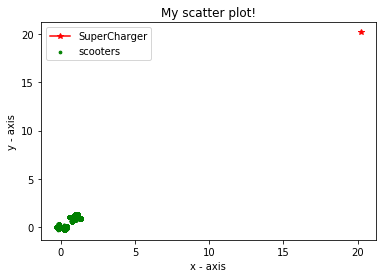

In [19]:
import matplotlib.pyplot as plt 
  
# x-axis values 
x = data.xcoordinate
# y-axis values 
y = data.ycoordinate
  
# plotting points as a scatter plot 
plt.scatter(x, y, label= "scooters", color= "green",  
            marker= ".", s=30) 
plt.plot(20.19, 20.19, label = "SuperCharger", color = "red", marker = "*")
# x-axis label 
plt.xlabel('x - axis') 
# frequency label 
plt.ylabel('y - axis') 
# plot title 
plt.title('My scatter plot!') 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show() 

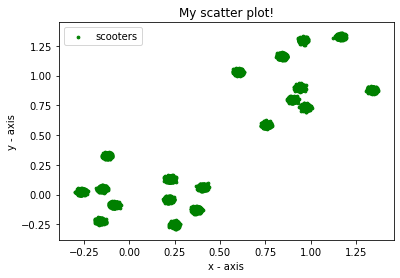

In [20]:
# x-axis values 
x = data.xcoordinate
# y-axis values 
y = data.ycoordinate
  
# plotting points as a scatter plot 
plt.scatter(x, y, label= "scooters", color= "green",  
            marker= ".", s=30) 
#plt.plot(20.19, 20.19, label = "SuperCharger", color = "red", marker = "*")
# x-axis label 
plt.xlabel('x - axis') 
# frequency label 
plt.ylabel('y - axis') 
# plot title 
plt.title('My scatter plot!') 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show() 

[[ 0.98812503  0.77379981]
 [-0.15658026  0.01204397]
 [ 0.88000396  1.20009559]
 [ 0.2856132  -0.02145622]]


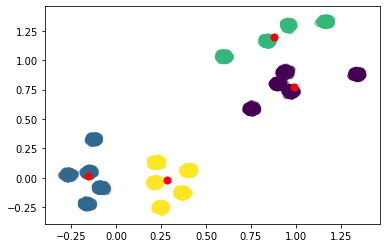

In [27]:
from sklearn.cluster import KMeans
Data = {'x': x, 'y': y}
df = pd.DataFrame(Data,columns=['x','y'])
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [39]:
import math

ans1 = math.sqrt((0.28+0.15)**2+(0.02+0.012)**2)
ans2 = math.sqrt((0.98+0.15)**2+(0.77-0.012)**2)
ans3 = math.sqrt((0.88+0.15)**2+(1.2-0.012)**2)
ans4 = math.sqrt((0.28-0.88)**2+(-0.02-0.012)**2)
ans5 = math.sqrt((0.28-0.988)**2+(-0.02-0.77)**2)
ans6 = math.sqrt((0.98+0.88)**2+(0.02+0.012)**2)
print(ans1)
print(ans2)
print(ans3)
print(ans4)
print(ans5)
print(ans6)

0.4311890536643991
1.3606851215472298
1.5723371139803322
0.6008527273800128
1.060831749147809
1.860275248451153


In [45]:
numScooters = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

In [51]:
print(len(numScooters[0]))
print(len(numScooters[1]))
print(len(numScooters[2]))
print(len(numScooters[3]))


7050
5813
4886
7919


In [53]:
 clusterPred = kmeans.predict(df)

In [64]:
print(clusterPred)
count0 = 0
count1 = 0
count2 = 0
count3 = 0

for k in range(0, len(clusterPred)):
    if (clusterPred[k] == 0):
        count0= count0+1
    elif (clusterPred[k] == 1):
        count1= count1+1
    elif (clusterPred[k] == 2):
        count2= count2+1
    else:
        count3= count3+1
        
print(count0, count1, count2, count3)

[0 0 0 ... 2 2 2]
7050 5813 4886 7919


In [65]:
avgBattery0 = 0
avgBattery1 = 0
avgBattery2 = 0
avgBattery3 = 0
for i in range(len(data.scooter_id)):
    if (clusterPred[i] == 0):
        avgBattery0 += data.power_level[i]
    elif (clusterPred[i] == 1):
        avgBattery1 += data.power_level[i]
    elif (clusterPred[i] == 2):
        avgBattery2 += data.power_level[i]
    else:
        avgBattery3 += data.power_level[i]
        
avgBattery0 =  avgBattery0/count0
avgBattery1 =  avgBattery1/count1
avgBattery2 =  avgBattery2/count2
avgBattery3 =  avgBattery3/count3

In [66]:
print(avgBattery0, avgBattery1, avgBattery2, avgBattery3)

2.4878014184397164 2.471357302597626 2.4969300040933278 2.521025381992676
